# random forest

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import os


In [14]:
def load_data(file_path):
    file_extension = file_path.split(".")[-1].lower()

    full_file_path = os.path.join(os.path.dirname(os.path.dirname(os.path.dirname(os.getcwd()))),"VSC_work","Data",file_path)
    print(f"从{full_file_path}加载数据集")

    # 判断文件类型
    if file_extension in ["csv"]:
        data = pd.read_csv(full_file_path)
    elif file_extension in ["xlsx"]:
        data = pd.read_excel(full_file_path, engine="openpyxl")
    else:
        print(f"不支持的文件类型：{file_extension}")

    # 确保时间列time为datetime格式
    if "time" not in data.columns and "close" in data.columns:  # 数据集没有time列
        data["time"] = pd.to_datetime(data["date"])  # 统一使用time代表时间
    else:
        # 提取需要的部分并格式化
        data["time"] = data["time"].astype(str).str[:12]
        data["time"] = pd.to_datetime(data["time"], format="%Y%m%d%H%M")

    # 按时间排序
    data.sort_values(by="time", inplace=True)
    data.head(3)
    data.reset_index(drop=True)
    # 设置日期为索引
    data.set_index('time', inplace=True)
    print("数据集加载完成")
    return data

In [15]:
df = load_data("光大嘉宝最新数据.xlsx")

dfbu = df.copy()

从c:\Users\0704\VSC_work\Data\光大嘉宝最新数据.xlsx加载数据集
数据集加载完成


In [16]:
df = dfbu.copy()
df = df [df.index.year==2022]
df.columns

Index(['date', 'code', 'open', 'high', 'low', 'close', 'volume', 'amount',
       'adjustflag'],
      dtype='object')

In [17]:

# 选择特征和目标变量
# 假设我们使用 'Open', 'High', 'Low', 'Volume' 作为特征，预测 'Close' 价格
features = ['open', 'high', 'low',  'volume']
target = 'close'

# 创建特征和目标变量
X = df[features]
y = df[target]

# 数据分割
# 将数据分为训练集和测试集（例如，80% 训练集，20% 测试集）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 模型训练
# 初始化随机森林回归器
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# 训练模型
rf.fit(X_train, y_train)

# 模型评估
# 在测试集上进行预测
y_pred = rf.predict(X_test)

# 将预测结果转换为 DataFrame，并设置索引
y_pred_df = pd.DataFrame(y_pred, index=X_test.index, columns=['Predicted Close Price'])
y_test = y_test.sort_index()
y_pred_df = y_pred_df.sort_index()

# 计算评估指标
mse = mean_squared_error(y_test, y_pred_df)
r2 = r2_score(y_test, y_pred_df)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")



Mean Squared Error: 0.00022109871521084517
R^2 Score: 0.9992519284667661


<Figure size 640x480 with 0 Axes>

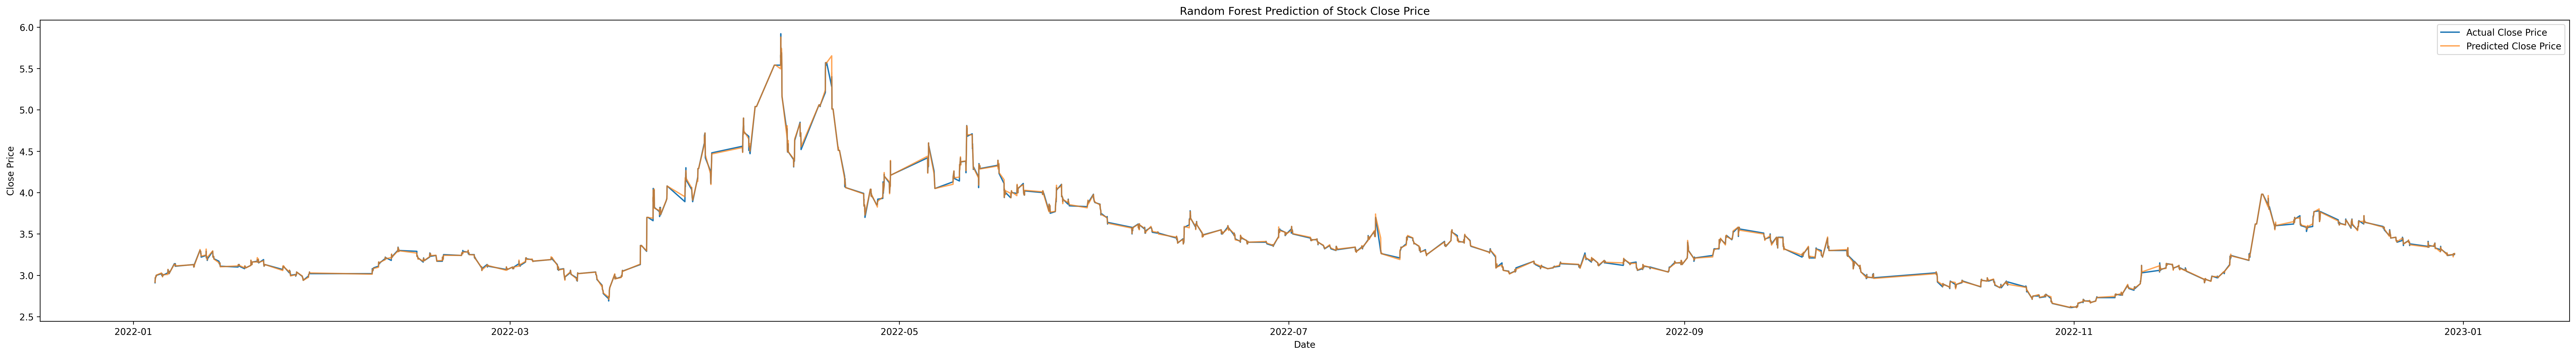

In [18]:


# 可视化预测结果
plt.clf()
plt.figure(figsize=(50, 6), dpi=300) 

plt.plot(y_test.index, y_test, label='Actual Close Price',)
plt.plot(y_pred_df.index, y_pred_df, label='Predicted Close Price', alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Random Forest Prediction of Stock Close Price')
plt.legend()

# Save the figure in a high-quality format
plt.savefig('random_forest_prediction.svg', bbox_inches='tight')

plt.show()

In [19]:
df2 = dfbu.copy()
df2 = df2 [df2.index.year==2023]

# 在未来数据上进行预测
X_future = df2[features]
Y_future =  df2[target]
y_pred_future = rf.predict(X_future)

# 将预测结果转换为 DataFrame，并设置索引
y_pred_future = pd.DataFrame(y_pred_future, index=X_future.index, columns=['Predicted Close Price'])
Y_future = Y_future.sort_index()
y_pred_future = y_pred_future.sort_index()


# 计算评估指标
mse = mean_squared_error(Y_future, y_pred_future)
r2 = r2_score(Y_future, y_pred_future)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Calculate additional regression metrics
mae = mean_absolute_error(Y_future, y_pred_future)
rmse = mean_squared_error(Y_future, y_pred_future)

print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

importances = rf.feature_importances_
print("Feature Importances:", importances)

Mean Squared Error: 8.772225507699074e-05
R^2 Score: 0.99870845737974
Mean Absolute Error: 0.006438066296077723
Root Mean Squared Error: 8.772225507699074e-05
Feature Importances: [3.77851502e-03 7.37434644e-01 2.58565119e-01 2.21721510e-04]


<Figure size 640x480 with 0 Axes>

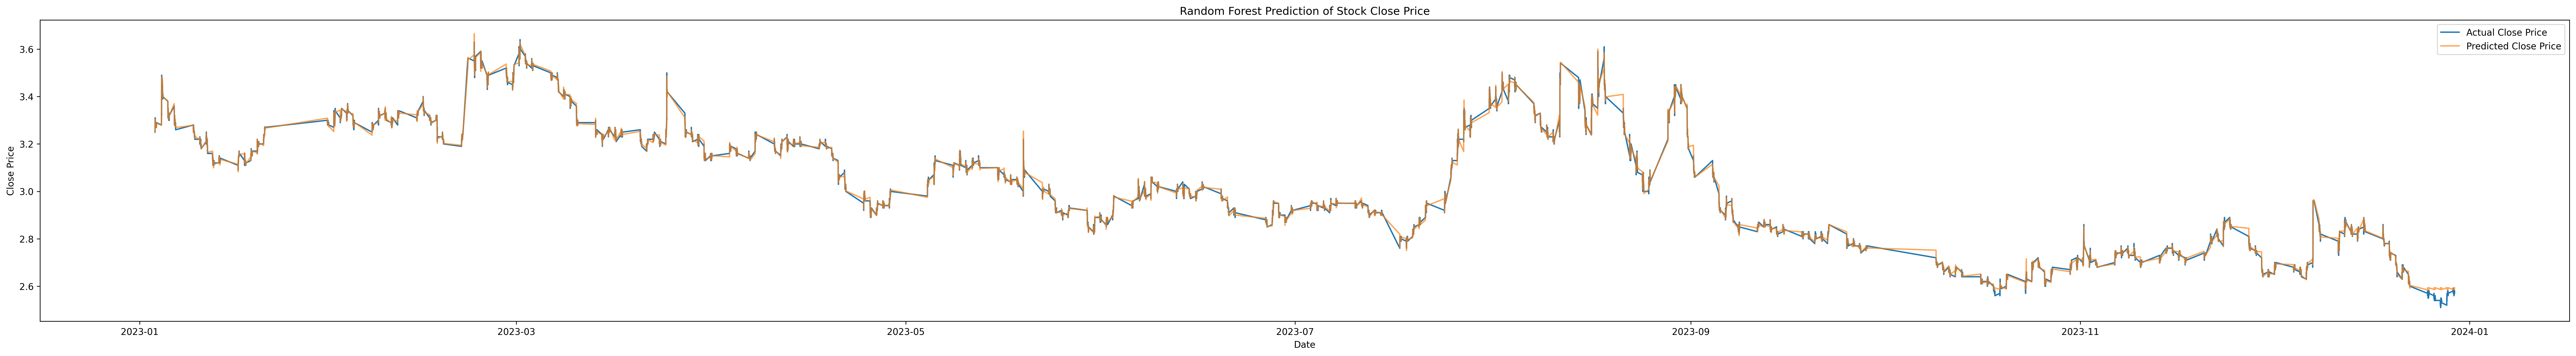

In [20]:
# 可视化预测结果
plt.clf()
plt.figure(figsize=(50, 6), dpi=300) 

plt.plot(Y_future.index, Y_future, label='Actual Close Price',)
plt.plot(y_pred_future.index, y_pred_future, label='Predicted Close Price', alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Random Forest Prediction of Stock Close Price')
plt.legend()

# Save the figure in a high-quality format
plt.savefig('Future_result.svg', bbox_inches='tight')

plt.show()

# Model Estimation

准确率 (Accuracy)

精确率 (Precision) 和 召回率 (Recall)

F1-score

ROC 曲线和 AUC 值

交叉验证 (Cross-Validation)